In [71]:
import pandas as pd
import matplotlib.pyplot as plt

TUVE QUE USAR PIP INSTALL OPENPYXL PARA PODER LEER LOS EXCELS.

Dado el formato del excel el cual contenía varias páginas, decidimos filtrar las páginas para luego solo usar solo las que nos interesan.


In [72]:
archivo = "SIMCE-matematicas-II-medio-Nacional-y-regional-1-1-1-2023.xlsx"
xl = pd.ExcelFile(archivo)
print(xl.sheet_names)


['PRESENTACIÓN', 'NACIONAL', 'REGIONAL']


In [73]:
datos_nacional = pd.read_excel(archivo)
datos_nacional

,Unnamed: 0,Unnamed: 1
0,NaN,INDICADORES DE GÉNERO
1,NaN,SUBCOMISIÓN DE ESTADÍSTICAS DE GÉNERO
2,1. Introducción,NaN
3,NaN,NaN
4,NaN,La Subcomisión de Estadísticas de Género (SEG)...
5,NaN,NaN
6,2. Características del cuadro esta...,NaN
7,NaN,NaN
8,NaN,"\nEste archivo presenta, a nivel nacional y re..."
9,NaN,NaN


Fijemonos que en este dataframe poco es lo que se entiende, dado que en el excel hay varias páginas y la función pd.read_Excel esta recibiendo todo el archivo. Para esto, vamos a filtrar el excel a solo las páginas que utilizaremos.
Investigando en la documentación de Pandas, nos fijamos que con el parametro sheet_name podemos filtrar el excel para que la función solo reciba la página indicada.

In [74]:
datos_nacional = pd.read_excel(archivo, sheet_name="NACIONAL", skiprows=2)
datos_regional = pd.read_excel(archivo, sheet_name="REGIONAL",  skiprows=2)
datos_nacional



,Año,Puntaje SIMCE de matemáticas hombres \n(puntos),Puntaje SIMCE de matemáticas mujeres\n(puntos),Brecha de género \n(puntos)
0,2006,257.0,247.0,-10.0
1,2008,254.0,246.0,-8.0
2,2010,260.0,251.0,-9.0
3,2012,269.0,261.0,-8.0
4,2013,271.0,262.0,-9.0
5,2014,267.0,262.0,-5.0
6,2015,263.0,261.0,-2.0
7,2016,267.0,264.0,-3.0
8,2017,267.0,265.0,-2.0
9,2018,266.0,261.0,-4.0


Vemos que hay un par de columnas al final que solo contienen texto y no contienen información que nos sea util, por ende las vamos a eliminar. Dado que son pocas columnas, las podemos eliminar una a una.

In [75]:
datos_nacional = datos_nacional.drop(index=[12, 13,14,15])
datos_nacional

,Año,Puntaje SIMCE de matemáticas hombres \n(puntos),Puntaje SIMCE de matemáticas mujeres\n(puntos),Brecha de género \n(puntos)
0,2006,257.0,247.0,-10.0
1,2008,254.0,246.0,-8.0
2,2010,260.0,251.0,-9.0
3,2012,269.0,261.0,-8.0
4,2013,271.0,262.0,-9.0
5,2014,267.0,262.0,-5.0
6,2015,263.0,261.0,-2.0
7,2016,267.0,264.0,-3.0
8,2017,267.0,265.0,-2.0
9,2018,266.0,261.0,-4.0


Finalmente obtenemos el dataframe con las filas y columnas ordenadas.
Ahora vamos a revisar los tipos de datos.

In [76]:
datos_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Año                                             12 non-null     object 
 1   Puntaje SIMCE de matemáticas hombres 
(puntos)  12 non-null     float64
 2   Puntaje SIMCE de matemáticas mujeres
(puntos)   12 non-null     float64
 3   Brecha de género 
(puntos)                      12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 516.0+ bytes


Vemos que todas las columnas tienen el tipo de dato incorrecto, la columna AÑO tiene datos tipo object donde a simple vista podemos ver que son de tipo int. Y las demás columnas están en tipo float, pero si nos fijamos en los datos vemos que no es necesario que estén en ese formato, asi que las pasamos a formato int.

In [77]:
datos_nacional["Puntaje SIMCE de matemáticas hombres \n(puntos)"] = datos_nacional["Puntaje SIMCE de matemáticas hombres \n(puntos)"].astype(int)
datos_nacional["Puntaje SIMCE de matemáticas mujeres\n(puntos)"] = datos_nacional["Puntaje SIMCE de matemáticas mujeres\n(puntos)"].astype(int)
datos_nacional["Año"] = datos_nacional["Año"].astype(int)
datos_nacional["Brecha de género \n(puntos)"] = datos_nacional["Brecha de género \n(puntos)"].astype(int)


In [78]:
datos_nacional

,Año,Puntaje SIMCE de matemáticas hombres \n(puntos),Puntaje SIMCE de matemáticas mujeres\n(puntos),Brecha de género \n(puntos)
0,2006,257,247,-10
1,2008,254,246,-8
2,2010,260,251,-9
3,2012,269,261,-8
4,2013,271,262,-9
5,2014,267,262,-5
6,2015,263,261,-2
7,2016,267,264,-3
8,2017,267,265,-2
9,2018,266,261,-4


Y ya tendríamos el dataframe listo para trabajar.

In [79]:
len(datos_nacional.columns)

4

Vemos que el dataframe contiene 4 columnas, las cuales son el AÑO en el que se dió el simce de matemática, el puntaje promedio de los hombres en el SIMCE de matemáticas, el puntaje promedio de las mujeres en el SIMCE de matemática, y la brecha de género en el puntaje, que es basicamente la diferencia.

Fijémonos en la última columna, esta nos indica la diferencia entre el puntaje promedio de los hombres y el de las mujeres en cada año respectivamente.

Podemos hacer un gráfico que nos muestre la distribución entre los puntajes entre ambos géneros.

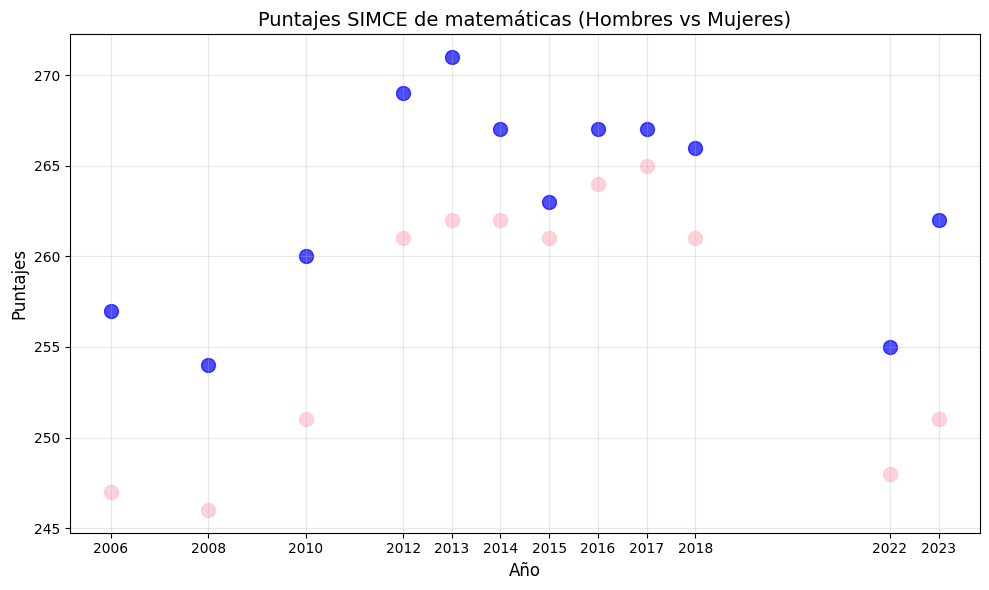

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(datos_nacional["Año"], datos_nacional["Puntaje SIMCE de matemáticas hombres \n(puntos)"], color='blue', label='Hombres', s=100, alpha=0.7)
plt.scatter(datos_nacional["Año"], datos_nacional["Puntaje SIMCE de matemáticas mujeres\n(puntos)"], color='pink', label='Mujeres', s=100, alpha=0.7)
plt.title("Puntajes SIMCE de matemáticas (Hombres vs Mujeres)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Puntajes", fontsize=12)
plt.xticks(datos_nacional["Año"])  
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

A traves de este gráfico podemos visualizar una clara brecha de género en los puntajes promedio del simce de matemáticas de un II°medio del año 2023, donde los hombres obtienen mejores resultados que las mujeres a través de los años. Vemos tambien que entre ambos géneros se mantiene una tendencia paralela, ya que cuando los puntajes de los hombres aumentan de un año a otro, el puntaje de las mujeres tambien aumenta, y si los puntajes de hombres disminuyen en un año, el puntaje de las mujeres también disminuye. Esto nos puede indicar que los factores que influyen en el desempeño matemático de los estudiantes afecta de la misma manera a ambos generos, pero con una brecha que favorece al género masculino.

--------------------------------------------------------------------------------------------------------------------------------

Ahora revisemos los datos por región. Y haremos el mismo procedimiento que hicimos con el dataframe anterior.

In [81]:
datos_regional = datos_regional.drop(index=[192, 193,194,195,196])
datos_regional

,Año,Región,Código región,Puntaje prueba de matemáticas hombres \n(puntos),Puntaje prueba de matemáticas mujeres \n(puntos),Brecha de género \n(puntos)
0,2006,Arica y Parinacota,15.0,247.0,240.0,-7.0
1,2008,Arica y Parinacota,15.0,251.0,242.0,-9.0
2,2010,Arica y Parinacota,15.0,251.0,244.0,-7.0
3,2012,Arica y Parinacota,15.0,264.0,251.0,-13.0
4,2013,Arica y Parinacota,15.0,260.0,245.0,-15.0
...,...,...,...,...,...,...
187,2016,Magallanes,12.0,263.0,255.0,-8.0
188,2017,Magallanes,12.0,259.0,258.0,-1.0
189,2018,Magallanes,12.0,263.0,261.0,-2.0
190,2022,Magallanes,12.0,252.0,248.0,-4.0


In [82]:
datos_regional["Puntaje prueba de matemáticas hombres \n(puntos)"] = datos_regional["Puntaje prueba de matemáticas hombres \n(puntos)"].astype(int)
datos_regional["Puntaje prueba de matemáticas mujeres  \n(puntos)"] = datos_regional["Puntaje prueba de matemáticas mujeres  \n(puntos)"].astype(int)
datos_regional["Año"] = datos_regional["Año"].astype(int)
datos_regional["Código región"] = datos_regional["Código región"].astype(int)

datos_regional["Brecha de género \n(puntos)"] = datos_regional["Brecha de género \n(puntos)"].astype(int)

In [83]:
datos_regional

,Año,Región,Código región,Puntaje prueba de matemáticas hombres \n(puntos),Puntaje prueba de matemáticas mujeres \n(puntos),Brecha de género \n(puntos)
0,2006,Arica y Parinacota,15,247,240,-7
1,2008,Arica y Parinacota,15,251,242,-9
2,2010,Arica y Parinacota,15,251,244,-7
3,2012,Arica y Parinacota,15,264,251,-13
4,2013,Arica y Parinacota,15,260,245,-15
...,...,...,...,...,...,...
187,2016,Magallanes,12,263,255,-8
188,2017,Magallanes,12,259,258,-1
189,2018,Magallanes,12,263,261,-2
190,2022,Magallanes,12,252,248,-4


-------------------------------------------------------------------------------------------------------------------------------------------

AHORA LOS TITULADOS.

In [84]:
archivo_titulados = "tituladas-carreras-tecnicas-area-tecnologia-nacional-y-regional.xlsx"
xl_titulados = pd.ExcelFile(archivo_titulados)
print(xl_titulados.sheet_names)


['PRESENTACIÓN', 'NACIONAL', 'REGIONAL']


In [85]:
datos_nacional_titulados = pd.read_excel(archivo_titulados, sheet_name="NACIONAL", skiprows=2)
datos_regional_titulados = pd.read_excel(archivo_titulados, sheet_name="REGIONAL",  skiprows=2)
datos_nacional_titulados = datos_nacional_titulados.drop(index=[17, 18,19,20,21])
datos_nacional_titulados


,Año,Personas tituladas\n(Total),Hombres titulados\n(Total),Mujeres tituladas\n(Total),Porcentaje de hombres titulados\n(%),Porcentaje de mujeres tituladas\n(%),Brecha de género (2)\n(pp.)
0,2007,5809.0,4886.0,923.0,84.110862,15.889138,-68.221725
1,2008,6865.0,5880.0,985.0,85.651857,14.348143,-71.303714
2,2009,7670.0,6513.0,1157.0,84.915254,15.084746,-69.830508
3,2010,7940.0,6747.0,1193.0,84.974811,15.025189,-69.949622
4,2011,10338.0,8532.0,1806.0,82.530470,17.469530,-65.060940
5,2012,12393.0,9978.0,2415.0,80.513193,19.486807,-61.026386
6,2013,15198.0,12112.0,3086.0,79.694697,20.305303,-59.389393
7,2014,18594.0,14479.0,4115.0,77.869205,22.130795,-55.738410
8,2015,24396.0,18227.0,6169.0,74.713068,25.286932,-49.426135
9,2016,26500.0,19883.0,6617.0,75.030189,24.969811,-50.060377


In [86]:
datos_nacional_titulados.columns

Index(['Año', 'Personas tituladas\n(Total)', 'Hombres titulados\n(Total)',
       'Mujeres tituladas\n(Total)', 'Porcentaje de hombres titulados\n(%)',
       'Porcentaje de mujeres tituladas\n(%)', 'Brecha de género (2)\n(pp.)'],
      dtype='object')

In [87]:
datos_nacional_titulados["Año"] = datos_nacional_titulados["Año"].astype(int)
datos_nacional_titulados["Personas tituladas\n(Total)"] = datos_nacional_titulados["Personas tituladas\n(Total)"].astype(int)
datos_nacional_titulados["Hombres titulados\n(Total)"] = datos_nacional_titulados["Hombres titulados\n(Total)"].astype(int)
datos_nacional_titulados["Mujeres tituladas\n(Total)"] = datos_nacional_titulados["Mujeres tituladas\n(Total)"].astype(int)
datos_nacional_titulados["Porcentaje de hombres titulados\n(%)"] = datos_nacional_titulados["Porcentaje de hombres titulados\n(%)"].astype(float)
datos_nacional_titulados["Porcentaje de mujeres tituladas\n(%)"] = datos_nacional_titulados["Porcentaje de mujeres tituladas\n(%)"].astype(float)
datos_nacional_titulados["Brecha de género (2)\n(pp.)"] = datos_nacional_titulados["Brecha de género (2)\n(pp.)"].astype(float)




In [88]:
datos_nacional_titulados

,Año,Personas tituladas\n(Total),Hombres titulados\n(Total),Mujeres tituladas\n(Total),Porcentaje de hombres titulados\n(%),Porcentaje de mujeres tituladas\n(%),Brecha de género (2)\n(pp.)
0,2007,5809,4886,923,84.110862,15.889138,-68.221725
1,2008,6865,5880,985,85.651857,14.348143,-71.303714
2,2009,7670,6513,1157,84.915254,15.084746,-69.830508
3,2010,7940,6747,1193,84.974811,15.025189,-69.949622
4,2011,10338,8532,1806,82.530470,17.469530,-65.060940
5,2012,12393,9978,2415,80.513193,19.486807,-61.026386
6,2013,15198,12112,3086,79.694697,20.305303,-59.389393
7,2014,18594,14479,4115,77.869205,22.130795,-55.738410
8,2015,24396,18227,6169,74.713068,25.286932,-49.426135
9,2016,26500,19883,6617,75.030189,24.969811,-50.060377


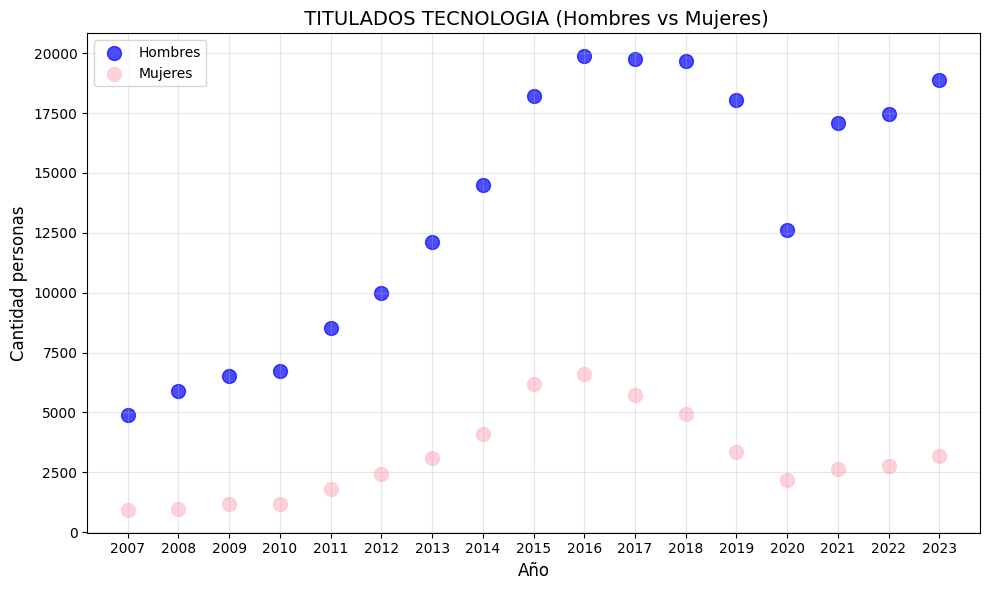

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(datos_nacional_titulados["Año"], datos_nacional_titulados["Hombres titulados\n(Total)"], color='blue', label='Hombres', s=100, alpha=0.7)
plt.scatter(datos_nacional_titulados["Año"], datos_nacional_titulados["Mujeres tituladas\n(Total)"], color='pink', label='Mujeres', s=100, alpha=0.7)
plt.title(" TITULADOS TECNOLOGIA (Hombres vs Mujeres)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad personas", fontsize=12)
plt.legend()
plt.xticks(datos_nacional_titulados["Año"]) 
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [90]:
datos_regional_titulados = datos_regional_titulados.drop(index=[272, 273,274,274,275])
datos_regional_titulados

,Región,Código región,Año,Personas tituladas\n(Total),Hombres titulados\n(Total),Mujeres tituladas\n(Total),Porcentaje de hombres titulados\n(%),Porcentaje de mujeres tituladas\n(%),Brecha de género (1) \n(pp.)
0,Arica y Parinacota,15.0,2007.0,42.0,37.0,5.0,88.095238,11.904762,-76.190476
1,Arica y Parinacota,15.0,2008.0,73.0,67.0,6.0,91.780822,8.219178,-83.561644
2,Arica y Parinacota,15.0,2009.0,94.0,86.0,8.0,91.489362,8.510638,-82.978723
3,Arica y Parinacota,15.0,2010.0,121.0,112.0,9.0,92.561983,7.438017,-85.123967
4,Arica y Parinacota,15.0,2011.0,131.0,111.0,20.0,84.732824,15.267176,-69.465649
...,...,...,...,...,...,...,...,...,...
267,Magallanes,12.0,2019.0,262.0,210.0,52.0,80.152672,19.847328,-60.305344
268,Magallanes,12.0,2020.0,132.0,115.0,17.0,87.121212,12.878788,-74.242424
269,Magallanes,12.0,2021.0,215.0,186.0,29.0,86.511628,13.488372,-73.023256
270,Magallanes,12.0,2022.0,233.0,187.0,46.0,80.257511,19.742489,-60.515021


In [91]:
datos_regional_titulados.columns

Index(['Región', 'Código región', 'Año', 'Personas tituladas\n(Total)',
       'Hombres titulados\n(Total)', 'Mujeres tituladas\n(Total)',
       'Porcentaje de hombres titulados\n(%)',
       'Porcentaje de mujeres tituladas\n(%)', 'Brecha de género (1) \n(pp.)'],
      dtype='object')

In [92]:
datos_regional_titulados["Año"] = datos_regional_titulados["Año"].astype(int)
datos_regional_titulados["Personas tituladas\n(Total)"] = datos_regional_titulados["Personas tituladas\n(Total)"].astype(int)
datos_regional_titulados["Hombres titulados\n(Total)"] = datos_regional_titulados["Hombres titulados\n(Total)"].astype(int)
datos_regional_titulados["Mujeres tituladas\n(Total)"] = datos_regional_titulados["Mujeres tituladas\n(Total)"].astype(int)
datos_regional_titulados["Código región"] = datos_regional_titulados["Código región"].astype(int)

datos_regional_titulados["Porcentaje de hombres titulados\n(%)"] = datos_regional_titulados["Porcentaje de hombres titulados\n(%)"].astype(float)
datos_regional_titulados["Porcentaje de mujeres tituladas\n(%)"] = datos_regional_titulados["Porcentaje de mujeres tituladas\n(%)"].astype(float)
datos_regional_titulados["Brecha de género (1) \n(pp.)"] = datos_regional_titulados["Brecha de género (1) \n(pp.)"].astype(float)

In [93]:
datos_regional_titulados

,Región,Código región,Año,Personas tituladas\n(Total),Hombres titulados\n(Total),Mujeres tituladas\n(Total),Porcentaje de hombres titulados\n(%),Porcentaje de mujeres tituladas\n(%),Brecha de género (1) \n(pp.)
0,Arica y Parinacota,15,2007,42,37,5,88.095238,11.904762,-76.190476
1,Arica y Parinacota,15,2008,73,67,6,91.780822,8.219178,-83.561644
2,Arica y Parinacota,15,2009,94,86,8,91.489362,8.510638,-82.978723
3,Arica y Parinacota,15,2010,121,112,9,92.561983,7.438017,-85.123967
4,Arica y Parinacota,15,2011,131,111,20,84.732824,15.267176,-69.465649
...,...,...,...,...,...,...,...,...,...
267,Magallanes,12,2019,262,210,52,80.152672,19.847328,-60.305344
268,Magallanes,12,2020,132,115,17,87.121212,12.878788,-74.242424
269,Magallanes,12,2021,215,186,29,86.511628,13.488372,-73.023256
270,Magallanes,12,2022,233,187,46,80.257511,19.742489,-60.515021


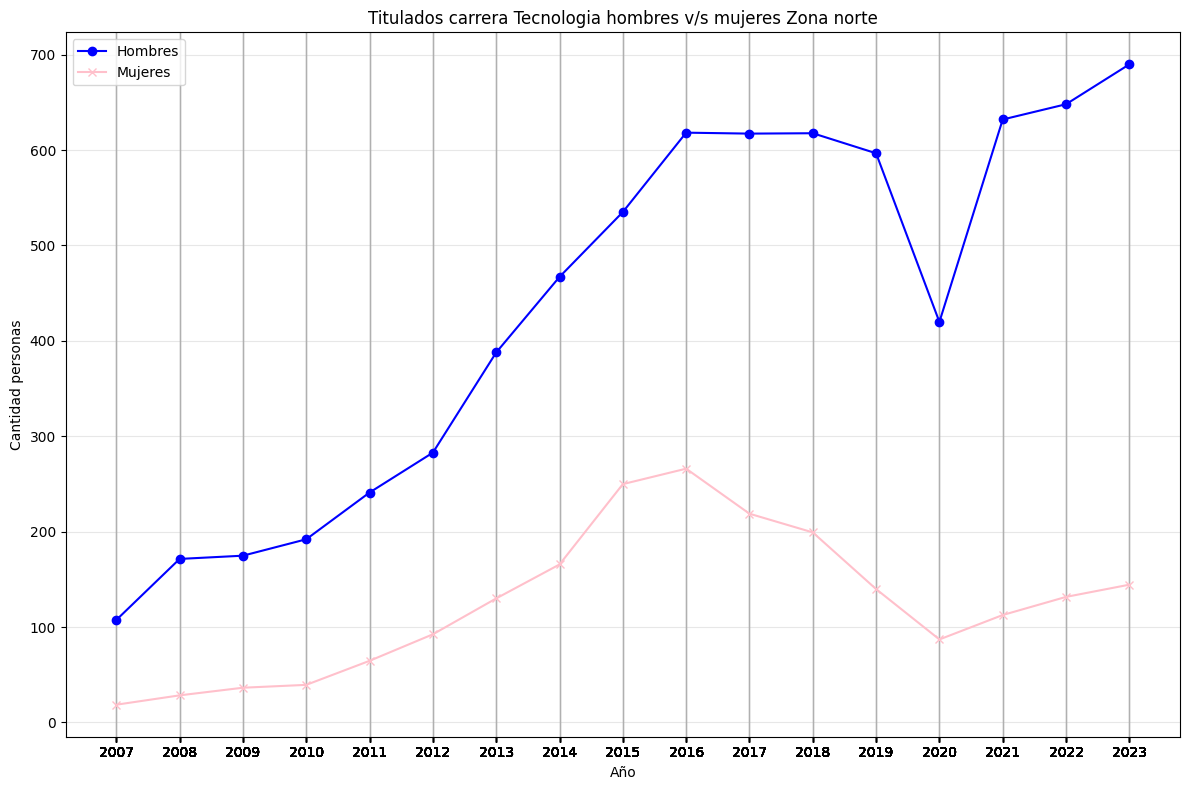

In [94]:
regiones_especificas_norte = ["Arica y Parinacota", "Antofagasta", "Atacama", "Tarapacá", "Coquimbo"]
datos_regional_filtrado = datos_regional_titulados[datos_regional_titulados['Región'].isin(regiones_especificas_norte)]
df_grouped = datos_regional_filtrado.groupby('Año').agg({ 'Hombres titulados\n(Total)': 'mean', 'Mujeres tituladas\n(Total)': 'mean' }).reset_index() 
df_grouped.columns = ['Año', 'Titulados Hombres', 'Tituladas Mujeres']

plt.figure(figsize=(12, 8))

plt.plot(df_grouped['Año'], df_grouped['Titulados Hombres'], marker='o', label='Hombres', color='blue')

plt.plot(df_grouped['Año'], df_grouped['Tituladas Mujeres'], marker='x', label='Mujeres', color='pink')

plt.title("Titulados carrera Tecnologia hombres v/s mujeres Zona norte")
plt.xlabel("Año")
plt.ylabel("Cantidad personas")
plt.xticks(datos_regional_titulados["Año"])
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

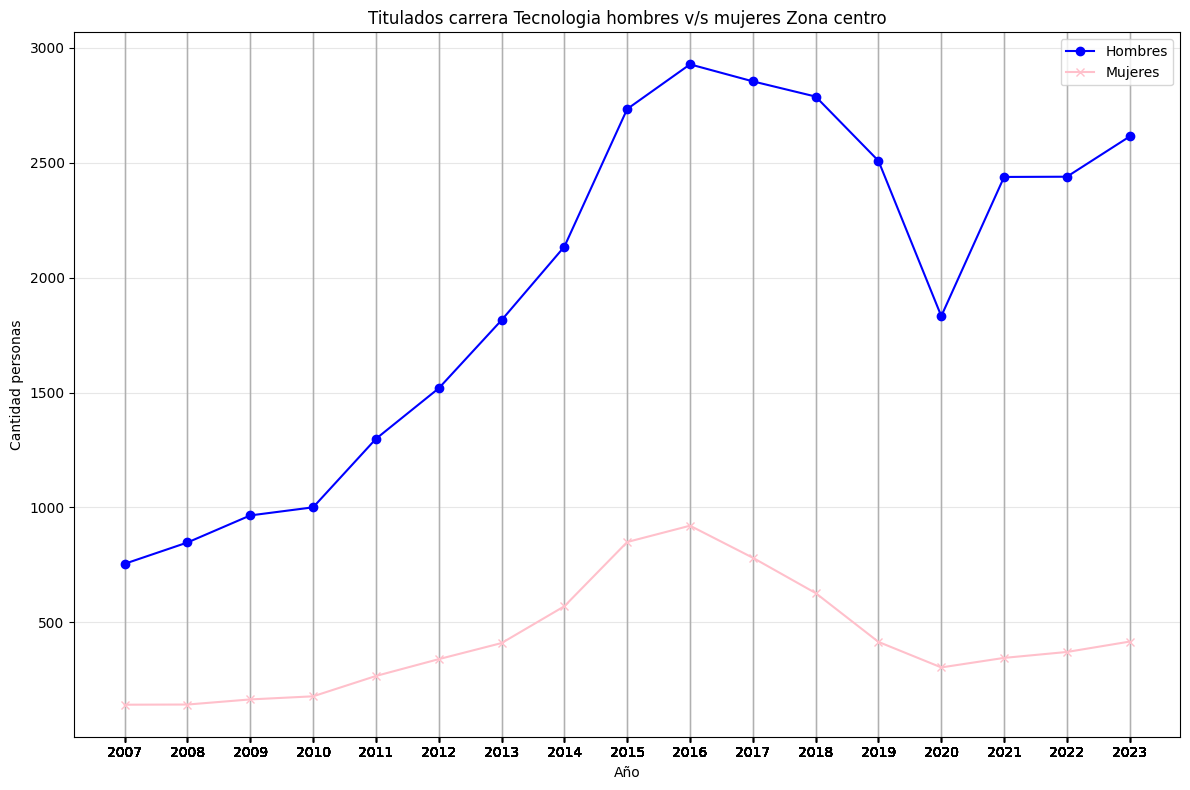

In [ ]:
regiones_especificas_2 = ['Valparaíso', 'Metropolitana', "O'Higgins", 'Maule']
datos_regional_filtrado_2 = datos_regional_titulados[datos_regional_titulados['Región'].isin(regiones_especificas_2)]
df_grouped = datos_regional_filtrado_2.groupby('Año').agg({ 'Hombres titulados\n(Total)': 'mean', 'Mujeres tituladas\n(Total)': 'mean' }).reset_index() 
df_grouped.columns = ['Año', 'Titulados Hombres', 'Tituladas Mujeres']

plt.figure(figsize=(12, 8))

plt.plot(df_grouped['Año'], df_grouped['Titulados Hombres'], marker='o', label='Hombres', color='blue')

plt.plot(df_grouped['Año'], df_grouped['Tituladas Mujeres'], marker='x', label='Mujeres', color='pink')

plt.title("Titulados carrera Tecnologia hombres v/s mujeres Zona centro")
plt.xlabel("Año")
plt.ylabel("Cantidad personas")
plt.xticks(datos_regional_titulados["Año"])
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

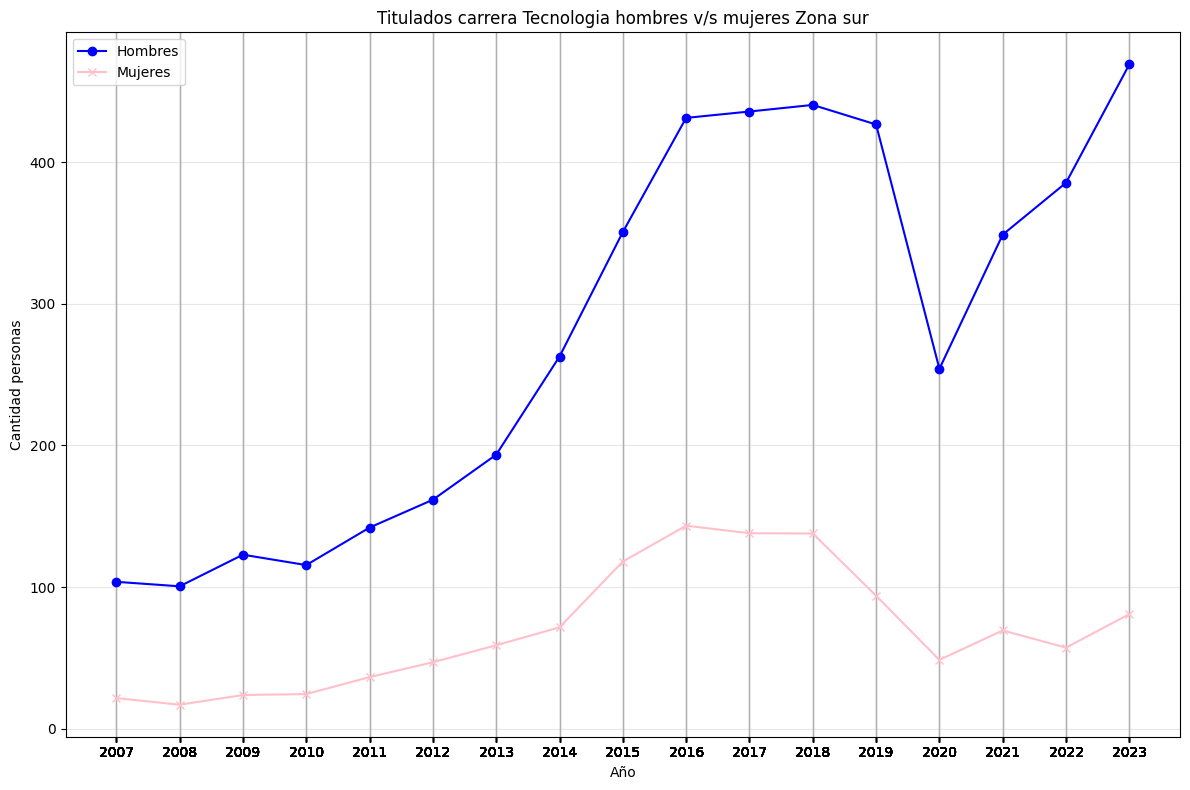

In [98]:
regiones_especificas_3 = ['Ñuble', 'BioBío', 'La Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén', 'Magallanes']
datos_regional_filtrado_3 = datos_regional_titulados[datos_regional_titulados['Región'].isin(regiones_especificas_3)]
df_grouped = datos_regional_filtrado_3.groupby('Año').agg({ 'Hombres titulados\n(Total)': 'mean', 'Mujeres tituladas\n(Total)': 'mean' }).reset_index() 
df_grouped.columns = ['Año', 'Titulados Hombres', 'Tituladas Mujeres']

plt.figure(figsize=(12, 8))

plt.plot(df_grouped['Año'], df_grouped['Titulados Hombres'], marker='o', label='Hombres', color='blue')

plt.plot(df_grouped['Año'], df_grouped['Tituladas Mujeres'], marker='x', label='Mujeres', color='pink')

plt.title("Titulados carrera Tecnologia hombres v/s mujeres Zona sur")
plt.xlabel("Año")
plt.ylabel("Cantidad personas")
plt.xticks(datos_regional_titulados["Año"])
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------